# **Colecting Data**

In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json

token = {"username":"sownan","key":"c21620b827cc38362ed399ac8382941b"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [16]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [17]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction

  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 51.3MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 61.9MB/s]
 99% 1.55G/1.56G [00:16<00:00, 85.2MB/s]
100% 1.56G/1.56G [00:16<00:00, 99.6MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 396kB/s]


In [18]:
!unzip /content/{/content}/competitions/new-york-city-taxi-fare-prediction/train.csv.zip #\*.zip

Archive:  /content/{/content}/competitions/new-york-city-taxi-fare-prediction/train.csv.zip
  inflating: train.csv               


In [19]:
!pip install pyarrow

     |████████████████████████████████| 48.5MB 1.2MB/s 


In [0]:
import numpy as np 
import pandas as pd 

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set_style("darkgrid")

In [5]:
%%time
# Reading File
#content/train.csv
train_path  = '../content/train.csv'

# Set columns to most suitable type to optimize for memory usage, default is float 64 but we just need float 32, it will save a lot of RAM
traintypes = {'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

cols = list(traintypes.keys())
# I used 5.000.000 rows to test and 16.000.000 to commit
train_df = pd.read_csv(train_path, usecols=cols, dtype=traintypes, nrows=5_000_000)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.58 µs


In [23]:
%%time
# Save into feather format, it will be faster for the next time 
train_df.to_feather('nyc_taxi_data_raw.feather')





CPU times: user 471 ms, sys: 381 ms, total: 852 ms
Wall time: 851 ms


In [0]:
df_train = pd.read_feather('nyc_taxi_data_raw.feather')
# check datatypes
#df_train.dtypes

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
fare_amount          float32
pickup_datetime      object
pickup_longitude     float32
pickup_latitude      float32
dropoff_longitude    float32
dropoff_latitude     float32
passenger_count      uint8
dtypes: float32(5), object(1), uint8(1)
memory usage: 138.3+ MB


In [26]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.132035e+01,-7.128638e+01,4.173919e+01,-7.128626e+01,4.173621e+01,1.684695e+00
std,9.775069e+00,1.263840e+01,9.093792e+00,1.268524e+01,9.608747e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310365e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [27]:
#/content/{/content}/competitions/new-york-city-taxi-fare-prediction/test.csv
test_path  = '/content/{/content}/competitions/new-york-city-taxi-fare-prediction/test.csv'
df_test =  pd.read_csv(test_path)
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [29]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Analyzing Data

In [59]:
# Count the number of null value
df_train.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

## 1. Fare_Amout
After analyzing, I decided to choose data points with ***fare_amount*** in range from 0 to 250 


Column name: fare_amount
Q1 = 4.5, Q3 = 20.5
> No of data point out of range: 119123 



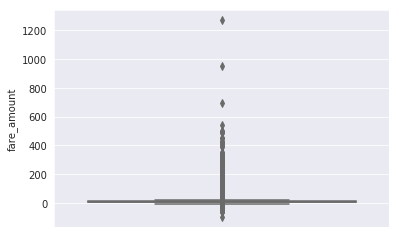

In [47]:
#Boxplot
col='fare_amount'
code_df = df_train
sns.boxplot(x=None, y= col, whis=1.5, data=code_df)
#plt.legend()
# which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
# or interquartile range (IQR)
# therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
Q1 = code_df[col].quantile(0.1)
Q3 = code_df[col].quantile(0.9)
IQR = Q3 - Q1      
print('Column name: %s' %col)
print('Q1 = {}, Q3 = {}'.format(Q1,Q3))
print('> No of data point out of range: %d \n' %((code_df[col] < (Q1 - 1.5 * IQR)) | (code_df[col] > (Q3 + 1.5 * IQR))).sum())

Text(0, 0.5, 'Frequency')

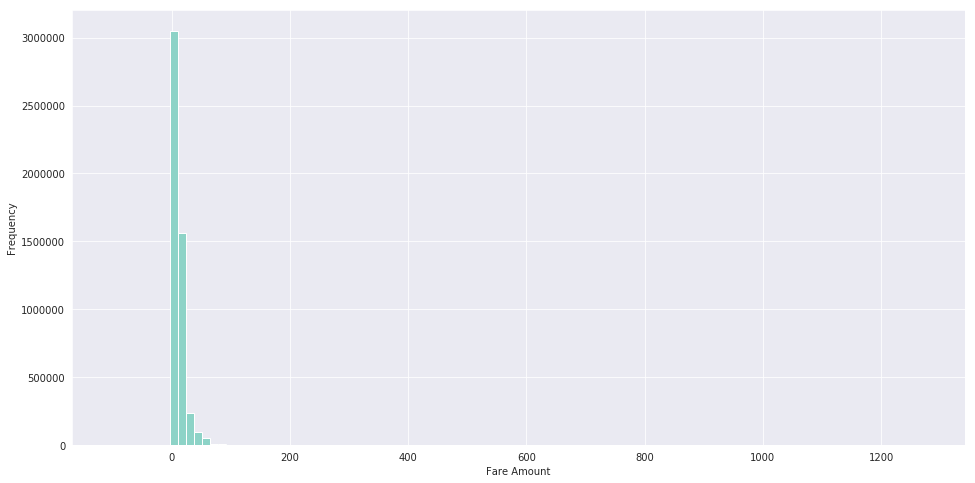

In [0]:
df_train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [37]:
print(len(df_train[df_train.fare_amount <= 0]))
print(len(df_train[df_train.fare_amount >= 250]))
print(len(df_train[(df_train.fare_amount > 0) & (df_train.fare_amount <= 250)]))

343
545
4999600


Text(0, 0.5, 'Frequency')

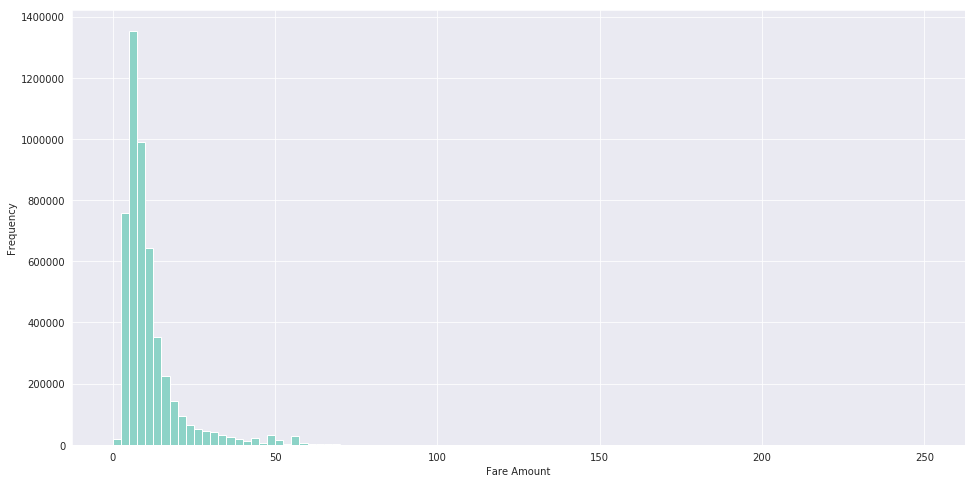

In [39]:
# Lets see the distribution of fare amount less than 100
df_train[(df_train.fare_amount > 0) & (df_train.fare_amount <= 250)].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

## No of passenger
In terms of passenger, we have nearly 17K over 5000K data points such cases where passanger count is zero, there can be two possibility:
- Passanger count is incorrectly populated
- Taxi was not carrying any passanger, may be taxi was used for goods

There is a weak correlation ( about 0.013) between ***fare_amount*** and ***passanger_count***


In [55]:
print(len(df_train[df_train.passenger_count <= 0]))
print(len(df_train[df_train.passenger_count >= 7]))

17639
12


Text(0, 0.5, 'Frequency')

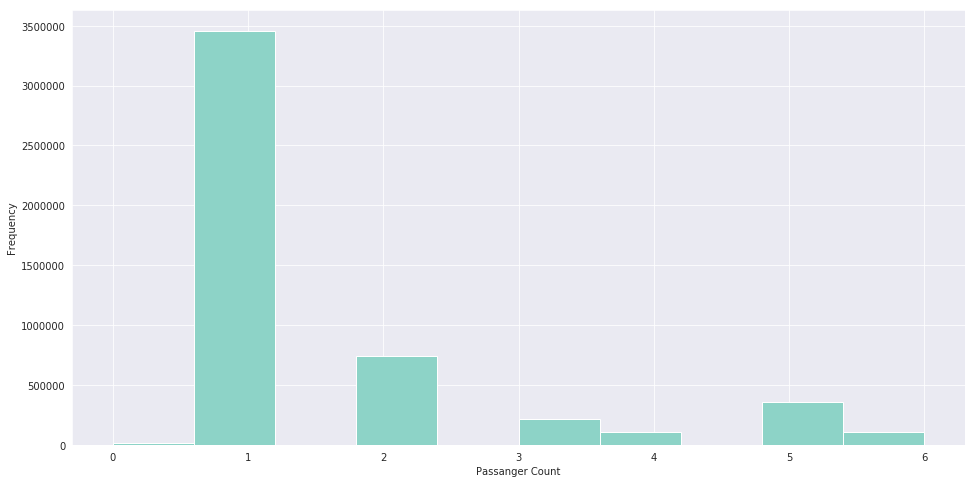

In [56]:
# checking for passanger count less than 7
df_train[df_train.passenger_count < 7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

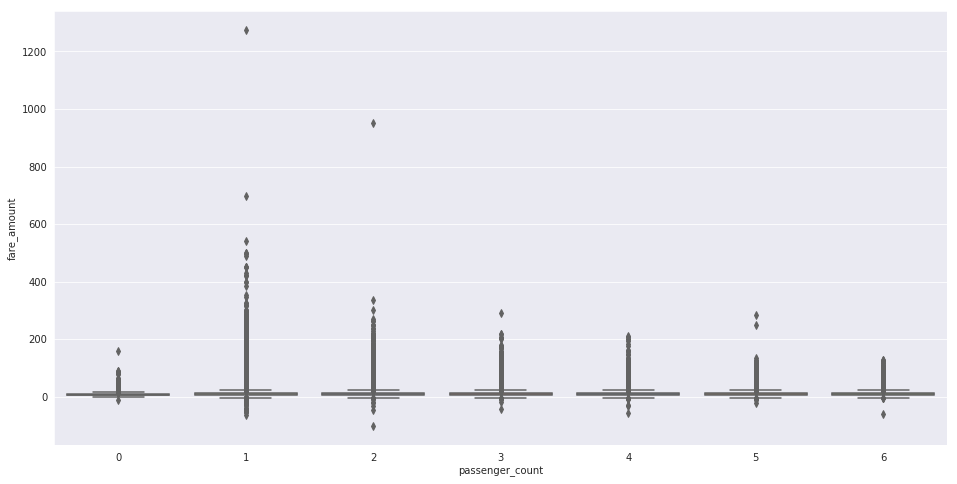

In [57]:
plt.figure(figsize= (16,8))
sns.boxplot(x = df_train[df_train.passenger_count < 7].passenger_count, y = df_train.fare_amount)

In [58]:
df_train[df_train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.013199
passenger_count,0.013199,1.000000


## pick up date

To deal with date type feature, I try to explore more info based on the initial date, such as:
  - pick_up_hours
  - pickup_day, pickup_weekday, pickup_month, pickup_year

In [0]:
# add more info based on pickup_date
def add_datetime_info(dataset):
    #Convert to datetime format
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime']
                                                ,format="%Y-%m-%d %H:%M:%S UTC")
    
    dataset['pickup_hour'] = dataset.pickup_datetime.dt.hour
    dataset['pickup_day'] = dataset.pickup_datetime.dt.day
    dataset['pickup_month'] = dataset.pickup_datetime.dt.month
    dataset['pickup_weekday'] = dataset.pickup_datetime.dt.weekday
    dataset['pickup_year'] = dataset.pickup_datetime.dt.year
# ['pickup_day','pickup_month','pickup_weekday', 'pickup_year'] 
    return dataset

## Pick up location

In [78]:
df_train[((df_train.pickup_longitude == 0) & (df_train.pickup_latitude == 0) &
          (df_train.dropoff_longitude == 0) & (df_train.dropoff_latitude == 0) )]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3
15,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1
26,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1
124,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2
192,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5
233,8.5,2011-07-24 01:14:35 UTC,0.0,0.0,0.0,0.0,2
273,8.1,2009-10-30 18:13:00 UTC,0.0,0.0,0.0,0.0,4
357,8.5,2013-07-04 16:41:27 UTC,0.0,0.0,0.0,0.0,1
376,2.5,2014-05-29 05:57:22 UTC,0.0,0.0,0.0,0.0,1
387,13.0,2012-11-15 08:39:00 UTC,0.0,0.0,0.0,0.0,1


In [64]:
# minimum and maximum longitude test set
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())


(-74.263242, -72.986532)

In [63]:
# minimum and maximum latitude test
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [0]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [0]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

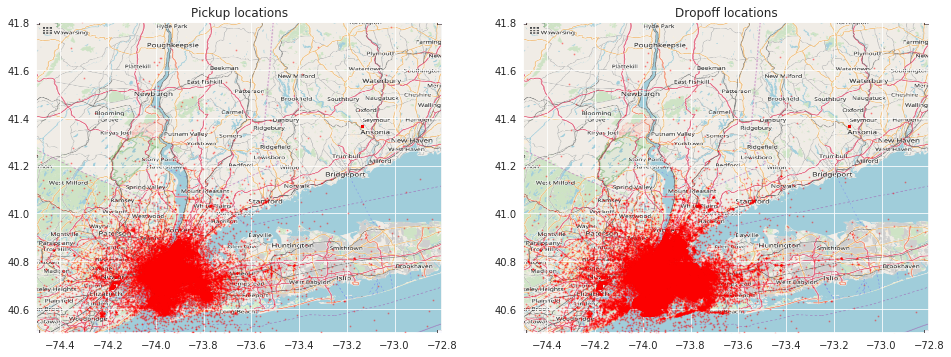

In [67]:
# plot training data on map
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

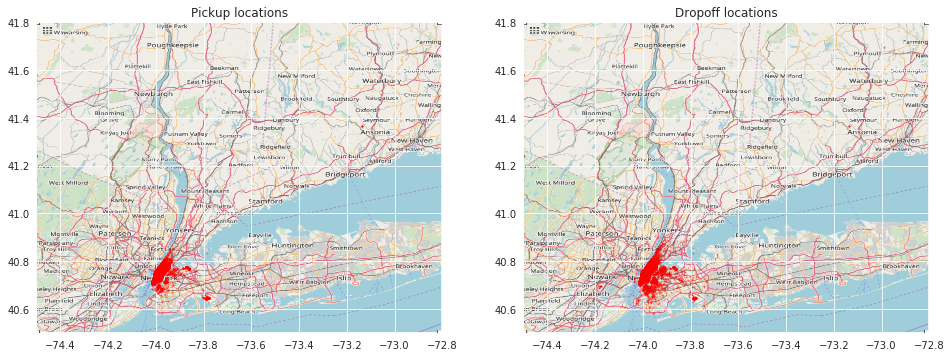

In [68]:
# plot test data on map
plot_on_map(df_test, BB, nyc_map, s=1, alpha=0.3)

In [0]:
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # read nyc mask and turn into boolean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # calculate for each lon,lat coordinate the xy coordinate in the mask map
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # return only datapoints on land
    return df[idx]

In [91]:
print('Old size: %d' % len(df_train))

df_removeinwater = df_train.dropna(how = 'any', axis = 'rows')

df_removeinwater = df_removeinwater[(df_removeinwater.fare_amount > 0) 
                                    & (df_removeinwater.fare_amount < 250)]
df_removeinwater = df_removeinwater[(df_removeinwater.passenger_count  >= 0) 
                                    & (df_removeinwater.passenger_count  < 7)]

df_removeinwater = df_removeinwater[select_within_boundingbox(df_removeinwater, BB)]
df_removeinwater = remove_datapoints_from_water(df_removeinwater)
print('New size: %d' % len(df_removeinwater))
print('Removed data points: %d' % (len(df_train)-len(df_removeinwater)))

Old size: 5000000
New size: 4892579
Removed data points: 107421


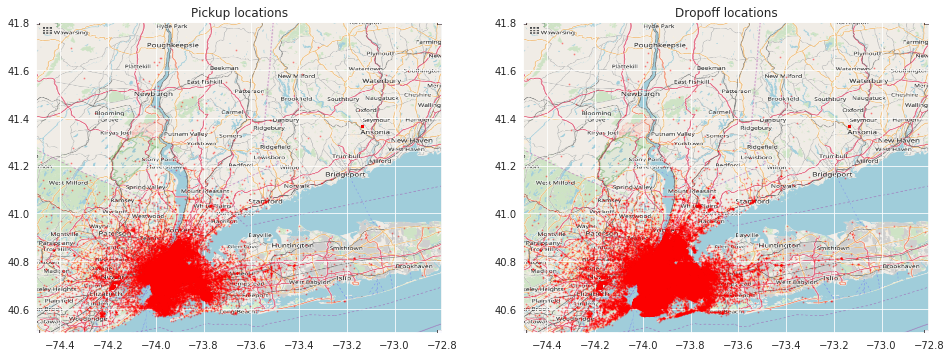

In [92]:
# plot training data on map
plot_on_map(df_removeinwater, BB, nyc_map, s=1, alpha=0.3)

### Distance
 Notice that the calculated distance in the dataset is from point to point. In reality, the distance measured by road is larger.


In [0]:
# To Compute Haversine distance
def sphere_dist(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    return 2 * R_earth * np.arcsin(np.sqrt(a))

    
def sphere_dist_bear(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = pickup_lon - dropoff_lon
    
    #Compute bearing distance
    a = np.arctan2(np.sin(dlon * np.cos(dropoff_lat)),np.cos(pickup_lat) * np.sin(dropoff_lat) - np.sin(pickup_lat) * np.cos(dropoff_lat) * np.cos(dlon))
    return a


In [0]:
df_removeinwater['distance'] = sphere_dist(df_removeinwater['pickup_latitude'], df_removeinwater['pickup_longitude'], 
                                   df_removeinwater['dropoff_latitude'] , df_removeinwater['dropoff_longitude']) 

df_removeinwater['bearing'] = sphere_dist_bear(df_removeinwater['pickup_latitude'], df_removeinwater['pickup_longitude'], 
                                   df_removeinwater['dropoff_latitude'] , df_removeinwater['dropoff_longitude'])   

count    4.892579e+06
mean     3.326671e+00
std      3.769365e+00
min      0.000000e+00
25%      1.253290e+00
50%      2.151952e+00
75%      3.908837e+00
max      1.438345e+02
Name: distance, dtype: float64

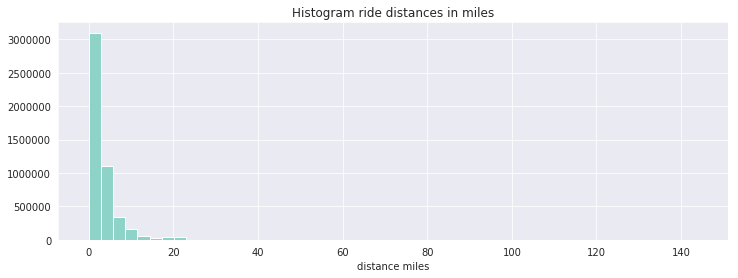

In [95]:
df_removeinwater['distance'].hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
df_removeinwater['distance'].describe()

In [96]:
df_removeinwater.groupby('passenger_count')['distance', 'fare_amount'].mean()

,distance,fare_amount
passenger_count,,
0,2.836646,8.946533
1,3.278679,11.185313
2,3.509577,11.799195
3,3.395727,11.551739
4,3.448707,11.761618
5,3.334546,11.194188
6,3.406801,12.142478


In [98]:
print("Average $USD/Mile : {:0.2f}".format(df_removeinwater.fare_amount.sum()/
                                           df_removeinwater.distance.sum()))

Average $USD/Mile : 3.40


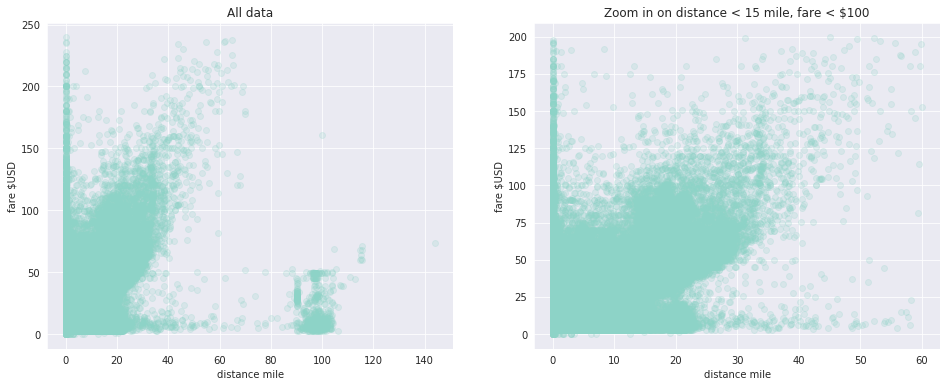

In [101]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_removeinwater.distance, df_removeinwater.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (df_removeinwater.distance < 60) & (df_removeinwater.fare_amount < 200)
axs[1].scatter(df_removeinwater[idx].distance, df_removeinwater[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

From this plot we notice:
  - There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
  - There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips or some promotions.
  - Overall there seems to be a (linear) relation between distance and fare.


### distance to airport
Another factor to explore this data is to check trips to/from well known places. E.g. a trip to JFK airport. 

Depending on the distance, a trip to an airport is often a fixed price.

In [0]:
def add_airport_dist(dataset):
    """
    Return minumum distance from pickup or dropoff coordinates to each airport.
    JFK: John F. Kennedy International Airport
    EWR: Newark Liberty International Airport
    LGA: LaGuardia Airport
    SOL: Statue of Liberty 
    NYC: Newyork Central
    """
    jfk_coord = (40.639722, -73.778889)
    ewr_coord = (40.6925, -74.168611)
    lga_coord = (40.77725, -73.872611)
    sol_coord = (40.6892,-74.0445) # Statue of Liberty
    nyc_coord = (40.7141667,-74.0063889) 
    
    
    pickup_lat = dataset['pickup_latitude']
    dropoff_lat = dataset['dropoff_latitude']
    pickup_lon = dataset['pickup_longitude']
    dropoff_lon = dataset['dropoff_longitude']
    
    pickup_jfk = sphere_dist(pickup_lat, pickup_lon, jfk_coord[0], jfk_coord[1]) 
    dropoff_jfk = sphere_dist(jfk_coord[0], jfk_coord[1], dropoff_lat, dropoff_lon) 
    pickup_ewr = sphere_dist(pickup_lat, pickup_lon, ewr_coord[0], ewr_coord[1])
    dropoff_ewr = sphere_dist(ewr_coord[0], ewr_coord[1], dropoff_lat, dropoff_lon) 
    pickup_lga = sphere_dist(pickup_lat, pickup_lon, lga_coord[0], lga_coord[1]) 
    dropoff_lga = sphere_dist(lga_coord[0], lga_coord[1], dropoff_lat, dropoff_lon)
    pickup_sol = sphere_dist(pickup_lat, pickup_lon, sol_coord[0], sol_coord[1]) 
    dropoff_sol = sphere_dist(sol_coord[0], sol_coord[1], dropoff_lat, dropoff_lon)
    pickup_nyc = sphere_dist(pickup_lat, pickup_lon, nyc_coord[0], nyc_coord[1]) 
    dropoff_nyc = sphere_dist(nyc_coord[0], nyc_coord[1], dropoff_lat, dropoff_lon)
    
    
    
    dataset['jfk_dist'] = pickup_jfk + dropoff_jfk
    dataset['ewr_dist'] = pickup_ewr + dropoff_ewr
    dataset['lga_dist'] = pickup_lga + dropoff_lga
    dataset['sol_dist'] = pickup_sol + dropoff_sol
    dataset['nyc_dist'] = pickup_nyc + dropoff_nyc
    
    return dataset

# Feature Engineering

In [0]:
df_train = pd.read_csv(train_path, usecols=cols, dtype=traintypes, nrows=16_000_000)

In [0]:
df_test =  pd.read_csv(test_path)

In [0]:
# drop null variables since it's not too much 36 variables over 5000K data points
df_train = df_train.dropna(how = 'any', axis = 'rows')

In [0]:
# cleaning fare_amount and passenger_count
df_train = df_train[(df_train.fare_amount > 0) & (df_train.fare_amount < 250)]
df_train = df_train[(df_train.passenger_count  >= 0) & (df_train.passenger_count  < 7)]

**Add features based on pickup_date**

In [0]:
# add more info based on pickup_date
def add_datetime_info(dataset):
    #Convert to datetime format
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime']
                                                ,format="%Y-%m-%d %H:%M:%S UTC")
    
    dataset['pickup_hour'] = dataset.pickup_datetime.dt.hour
    dataset['pickup_day'] = dataset.pickup_datetime.dt.day
    dataset['pickup_month'] = dataset.pickup_datetime.dt.month
    dataset['pickup_weekday'] = dataset.pickup_datetime.dt.weekday
    dataset['pickup_year'] = dataset.pickup_datetime.dt.year
# ['pickup_day','pickup_month','pickup_weekday', 'pickup_year'] 
    return dataset
  
df_train = add_datetime_info(df_train)
df_test = add_datetime_info(df_test)


**Remove in water location**

In [0]:
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # read nyc mask and turn into boolean map with
    # land = True, water = False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # calculate for each lon,lat coordinate the xy coordinate in the mask map
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # return only datapoints on land
    return df[idx]  


# removing in water datapoint
df_train = df_train[select_within_boundingbox(df_train, BB)]
df_train = remove_datapoints_from_water(df_train)

**Add features based on distance**

In [0]:
def calculate_abs_different(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
calculate_abs_different(df_train)
calculate_abs_different(df_test)

In [0]:
def convert_different_miles(df):
    df['abs_diff_longitude'] = df.abs_diff_longitude*50
    df['abs_diff_latitude'] = df.abs_diff_latitude*69
    
    
convert_different_miles(df_train)
convert_different_miles(df_test)

In [0]:
### Angle difference between north, and manhattan roadways
meas_ang = 0.506 # 29 degrees = 0.506 radians (https://en.wikipedia.org/wiki/Commissioners%27_Plan_of_1811)
import math

## adding extra features
def add_distance(df):
    df['Euclidean'] = (df.abs_diff_latitude**2 + df.abs_diff_longitude**2)**0.5 ### as the crow flies  
    df['delta_manh_long'] = (df.Euclidean*np.sin(np.arctan(df.abs_diff_longitude / df.abs_diff_latitude)-meas_ang)).abs()
    df['delta_manh_lat'] = (df.Euclidean*np.cos(np.arctan(df.abs_diff_longitude / df.abs_diff_latitude)-meas_ang)).abs()
    df['distance'] = df.delta_manh_long + df.delta_manh_lat
    df.drop(['abs_diff_longitude', 'abs_diff_latitude','Euclidean', 'delta_manh_long', 'delta_manh_lat'], axis=1, inplace=True)

add_distance(df_train)
add_distance(df_test)

In [0]:
def calculate_direction(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = pickup_lon - dropoff_lon
    
    #Compute bearing distance
    a = np.arctan2(np.sin(dlon * np.cos(dropoff_lat)),np.cos(pickup_lat) * np.sin(dropoff_lat) - np.sin(pickup_lat) * np.cos(dropoff_lat) * np.cos(dlon))
    return a

# We will convert pandas to numpy to get the best performance
df_train['direction'] = calculate_direction(df_train['pickup_latitude'].values, df_train['pickup_longitude'].values, 
                                   df_train['dropoff_latitude'].values , df_train['dropoff_longitude'].values) 
df_test['direction'] = calculate_direction(df_test['pickup_latitude'].values, df_test['pickup_longitude'].values, 
                                   df_test['dropoff_latitude'].values , df_test['dropoff_longitude'].values) 

In [0]:
# To Compute Haversine distance
def sphere_dist(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    return 2 * R_earth * np.arcsin(np.sqrt(a))

    
def sphere_dist_bear(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = pickup_lon - dropoff_lon
    
    #Compute bearing distance
    a = np.arctan2(np.sin(dlon * np.cos(dropoff_lat)),np.cos(pickup_lat) * np.sin(dropoff_lat) - np.sin(pickup_lat) * np.cos(dropoff_lat) * np.cos(dlon))
    return a

# train
df_train['distance'] = sphere_dist(df_train['pickup_latitude'], df_train['pickup_longitude'], 
                                   df_train['dropoff_latitude'] , df_train['dropoff_longitude']) 

df_train['bearing'] = sphere_dist_bear(df_train['pickup_latitude'], df_train['pickup_longitude'], 
                                   df_train['dropoff_latitude'] , df_train['dropoff_longitude'])  

# test
df_test['distance'] = sphere_dist(df_test['pickup_latitude'], df_test['pickup_longitude'], 
                                   df_test['dropoff_latitude'] , df_test['dropoff_longitude']) 

df_test['bearing'] = sphere_dist_bear(df_test['pickup_latitude'], df_test['pickup_longitude'], 
                                   df_test['dropoff_latitude'] , df_test['dropoff_longitude'])

In [0]:
def add_airport_dist(dataset):
    """
    Return minumum distance from pickup or dropoff coordinates to each airport.
    JFK: John F. Kennedy International Airport
    EWR: Newark Liberty International Airport
    LGA: LaGuardia Airport
    SOL: Statue of Liberty 
    NYC: Newyork Central
    """
    jfk_coord = (40.639722, -73.778889)
    ewr_coord = (40.6925, -74.168611)
    lga_coord = (40.77725, -73.872611)
    sol_coord = (40.6892,-74.0445) # Statue of Liberty
    nyc_coord = (40.7141667,-74.0063889) 
    
    
    pickup_lat = dataset['pickup_latitude']
    dropoff_lat = dataset['dropoff_latitude']
    pickup_lon = dataset['pickup_longitude']
    dropoff_lon = dataset['dropoff_longitude']
    
    pickup_jfk = sphere_dist(pickup_lat, pickup_lon, jfk_coord[0], jfk_coord[1]) 
    dropoff_jfk = sphere_dist(jfk_coord[0], jfk_coord[1], dropoff_lat, dropoff_lon) 
    pickup_ewr = sphere_dist(pickup_lat, pickup_lon, ewr_coord[0], ewr_coord[1])
    dropoff_ewr = sphere_dist(ewr_coord[0], ewr_coord[1], dropoff_lat, dropoff_lon) 
    pickup_lga = sphere_dist(pickup_lat, pickup_lon, lga_coord[0], lga_coord[1]) 
    dropoff_lga = sphere_dist(lga_coord[0], lga_coord[1], dropoff_lat, dropoff_lon)
    pickup_sol = sphere_dist(pickup_lat, pickup_lon, sol_coord[0], sol_coord[1]) 
    dropoff_sol = sphere_dist(sol_coord[0], sol_coord[1], dropoff_lat, dropoff_lon)
    pickup_nyc = sphere_dist(pickup_lat, pickup_lon, nyc_coord[0], nyc_coord[1]) 
    dropoff_nyc = sphere_dist(nyc_coord[0], nyc_coord[1], dropoff_lat, dropoff_lon)
    
    
    
    dataset['jfk_dist'] = pickup_jfk + dropoff_jfk
    dataset['ewr_dist'] = pickup_ewr + dropoff_ewr
    dataset['lga_dist'] = pickup_lga + dropoff_lga
    dataset['sol_dist'] = pickup_sol + dropoff_sol
    dataset['nyc_dist'] = pickup_nyc + dropoff_nyc
    
    return dataset

df_train = add_airport_dist(df_train)
df_test = add_airport_dist(df_test)


**Normalize lat and long**
  - After we extract more feature from long and lat, they are less important so we will normalize them to make sure they don't impact too much to our model.
  - We will convert them to radian so their range will shink from range of degrees ( 1 -> 360) to range of radians.



In [0]:
df_train['pickup_latitude'].apply(lambda x: np.radians(x))
df_train['pickup_longitude'].apply(lambda x: np.radians(x))
df_train['dropoff_latitude'].apply(lambda x: np.radians(x))
df_train['dropoff_longitude'].apply(lambda x: np.radians(x))

df_test['pickup_latitude'].apply(lambda x: np.radians(x))
df_test['pickup_longitude'].apply(lambda x: np.radians(x))
df_test['dropoff_latitude'].apply(lambda x: np.radians(x))
df_test['dropoff_longitude'].apply(lambda x: np.radians(x))

In [22]:
df_train.shape

(15656461, 20)

In [23]:
df_test.shape

(9914, 20)

# Modelling
I will choose some default value and modify it later if necessary, for example
  - if I see it overfitting, I will use smaller max_bin and num_leaves
  - if I see it is low accuracy, I will use larger max_bin and num_leaves
  
*max_bin* is max number of bins that feature values will be bucketed in, small number of bins may reduce training accuracy but may increase general power (deal with over-fitting)
*nume_leaves* max number of leaves in one tree

In [0]:
# We extracted feature with day, week, month, year so we can remove pickup_datetime
df_train.drop(columns=['pickup_datetime'], inplace=True)

y = df_train['fare_amount']
df_train = df_train.drop(columns=['fare_amount'])

In [0]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
x_train,x_test,y_train,y_test = train_test_split(df_train,y,random_state=123,test_size=0.1)

In [0]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.0620159, # 0.05,  0.1, 0.01, 0.5
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
    
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }

In [27]:
train_set = lgbm.Dataset(x_train, y_train, silent=False,
                         categorical_feature=['pickup_day','pickup_month','pickup_weekday', 'pickup_year'])
valid_set = lgbm.Dataset(x_test, y_test, silent=False,
                         categorical_feature=['pickup_day','pickup_month','pickup_weekday', 'pickup_year'])
model = lgbm.train(params, train_set = train_set, num_boost_round=5000,#10000,
                   early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 500 rounds.
[500]	valid_0's rmse: 3.49971
[1000]	valid_0's rmse: 3.44733
[1500]	valid_0's rmse: 3.42219
[2000]	valid_0's rmse: 3.40664
[2500]	valid_0's rmse: 3.39642
[3000]	valid_0's rmse: 3.38936
[3500]	valid_0's rmse: 3.38398
[4000]	valid_0's rmse: 3.37932
[4500]	valid_0's rmse: 3.37584
[5000]	valid_0's rmse: 3.37341
[5500]	valid_0's rmse: 3.36998
[6000]	valid_0's rmse: 3.36675
[6500]	valid_0's rmse: 3.36449
[7000]	valid_0's rmse: 3.36261
[7500]	valid_0's rmse: 3.36051
[8000]	valid_0's rmse: 3.35924
[8500]	valid_0's rmse: 3.35729
[9000]	valid_0's rmse: 3.35507
[9500]	valid_0's rmse: 3.35375
[10000]	valid_0's rmse: 3.35263
[10500]	valid_0's rmse: 3.35176
[11000]	valid_0's rmse: 3.35042
[11500]	valid_0's rmse: 3.34979
[12000]	valid_0's rmse: 3.34916
[12500]	valid_0's rmse: 3.34833
[13000]	valid_0's rmse: 3.34757
[13500]	valid_0's rmse: 3.34691
[14000]	valid_0's rmse: 3.34628
[14500]	valid_0's rmse: 3.34527
[15000]	valid_0's rmse: 3.344

**Search optial parameter**
using Gridsearch cross validation


In [0]:
from sklearn.model_selection  import GridSearchCV



In [0]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        #'num_leaves': 20,
        'learning_rate':  0.05 # 0.1, 0.01, 0.5
        'max_depth': -1, #limit the max depth for tree model.
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
    
        'metric': 'rmse',
        'min_split_gain': 0.5,
        # 'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }

model = lgbm.train(params, train_set = train_set, num_boost_round=1000,#10000,
                   early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)

param_grid1 = {    
    'num_leaves':range(26,36,1),
    'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(
    estimator = model, 
    param_grid = param_grid1,
    scoring='rmse',
    n_jobs=2,
    iid=False, cv=3)

gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

**Create submission**

In [0]:
df_train.describe()


test_key = df_test['key']

df_test.drop(columns=["pickup_datetime",'key'], axis=1, inplace=True)


In [0]:
prediction = model.predict(df_test, num_iteration = model.best_iteration)      



In [0]:
submission = pd.DataFrame({
        "key": test_key,
        "fare_amount": prediction
})

submission.to_csv('taxi_fare_submission_v26.csv',index=False)

# Final Result

![alt text](https://scontent.fsgn5-2.fna.fbcdn.net/v/t1.15752-9/60933886_2426450534257337_4245120296404647936_n.png?_nc_cat=107&_nc_ht=scontent.fsgn5-2.fna&oh=1e117e8226115884a21f834a67dabed7&oe=5D9CFC87)